In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Import the data
df = pd.read_csv("diabetes_updated.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
#x independent: glucose, blood pressure, insulin, BMI
x = df.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7]].values
x[1:6]

#y dependent: outcome
y = df.iloc[:,8].values
y = y.reshape(-1, 1)
#y.shape
#x.shape
x = x.reshape(-1, x.shape[1])


# create empty linear regression model
diabetes_model = LinearRegression()

# fit model(x,y)
diabetes_model.fit(x,y)

# Get intercept and coefficients
print('Intercept: \n', diabetes_model.intercept_)
print('Coefficients: \n', diabetes_model.coef_)

Intercept: 
 [-0.85389427]
Coefficients: 
 [[ 0.02059187  0.00592027 -0.00233188  0.00015452 -0.00018053  0.01324403
   0.14723744  0.00262139]]


In [35]:
# Split data into training and test sets
rseed = 15 # Use the same random seed for learning purposes to get the same result
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,  random_state=rseed)

print ("Training data:",x_train.shape, y_train.shape)
print ("Test data:",x_test.shape, y_test.shape)

Training data: (614, 8) (614, 1)
Test data: (154, 8) (154, 1)


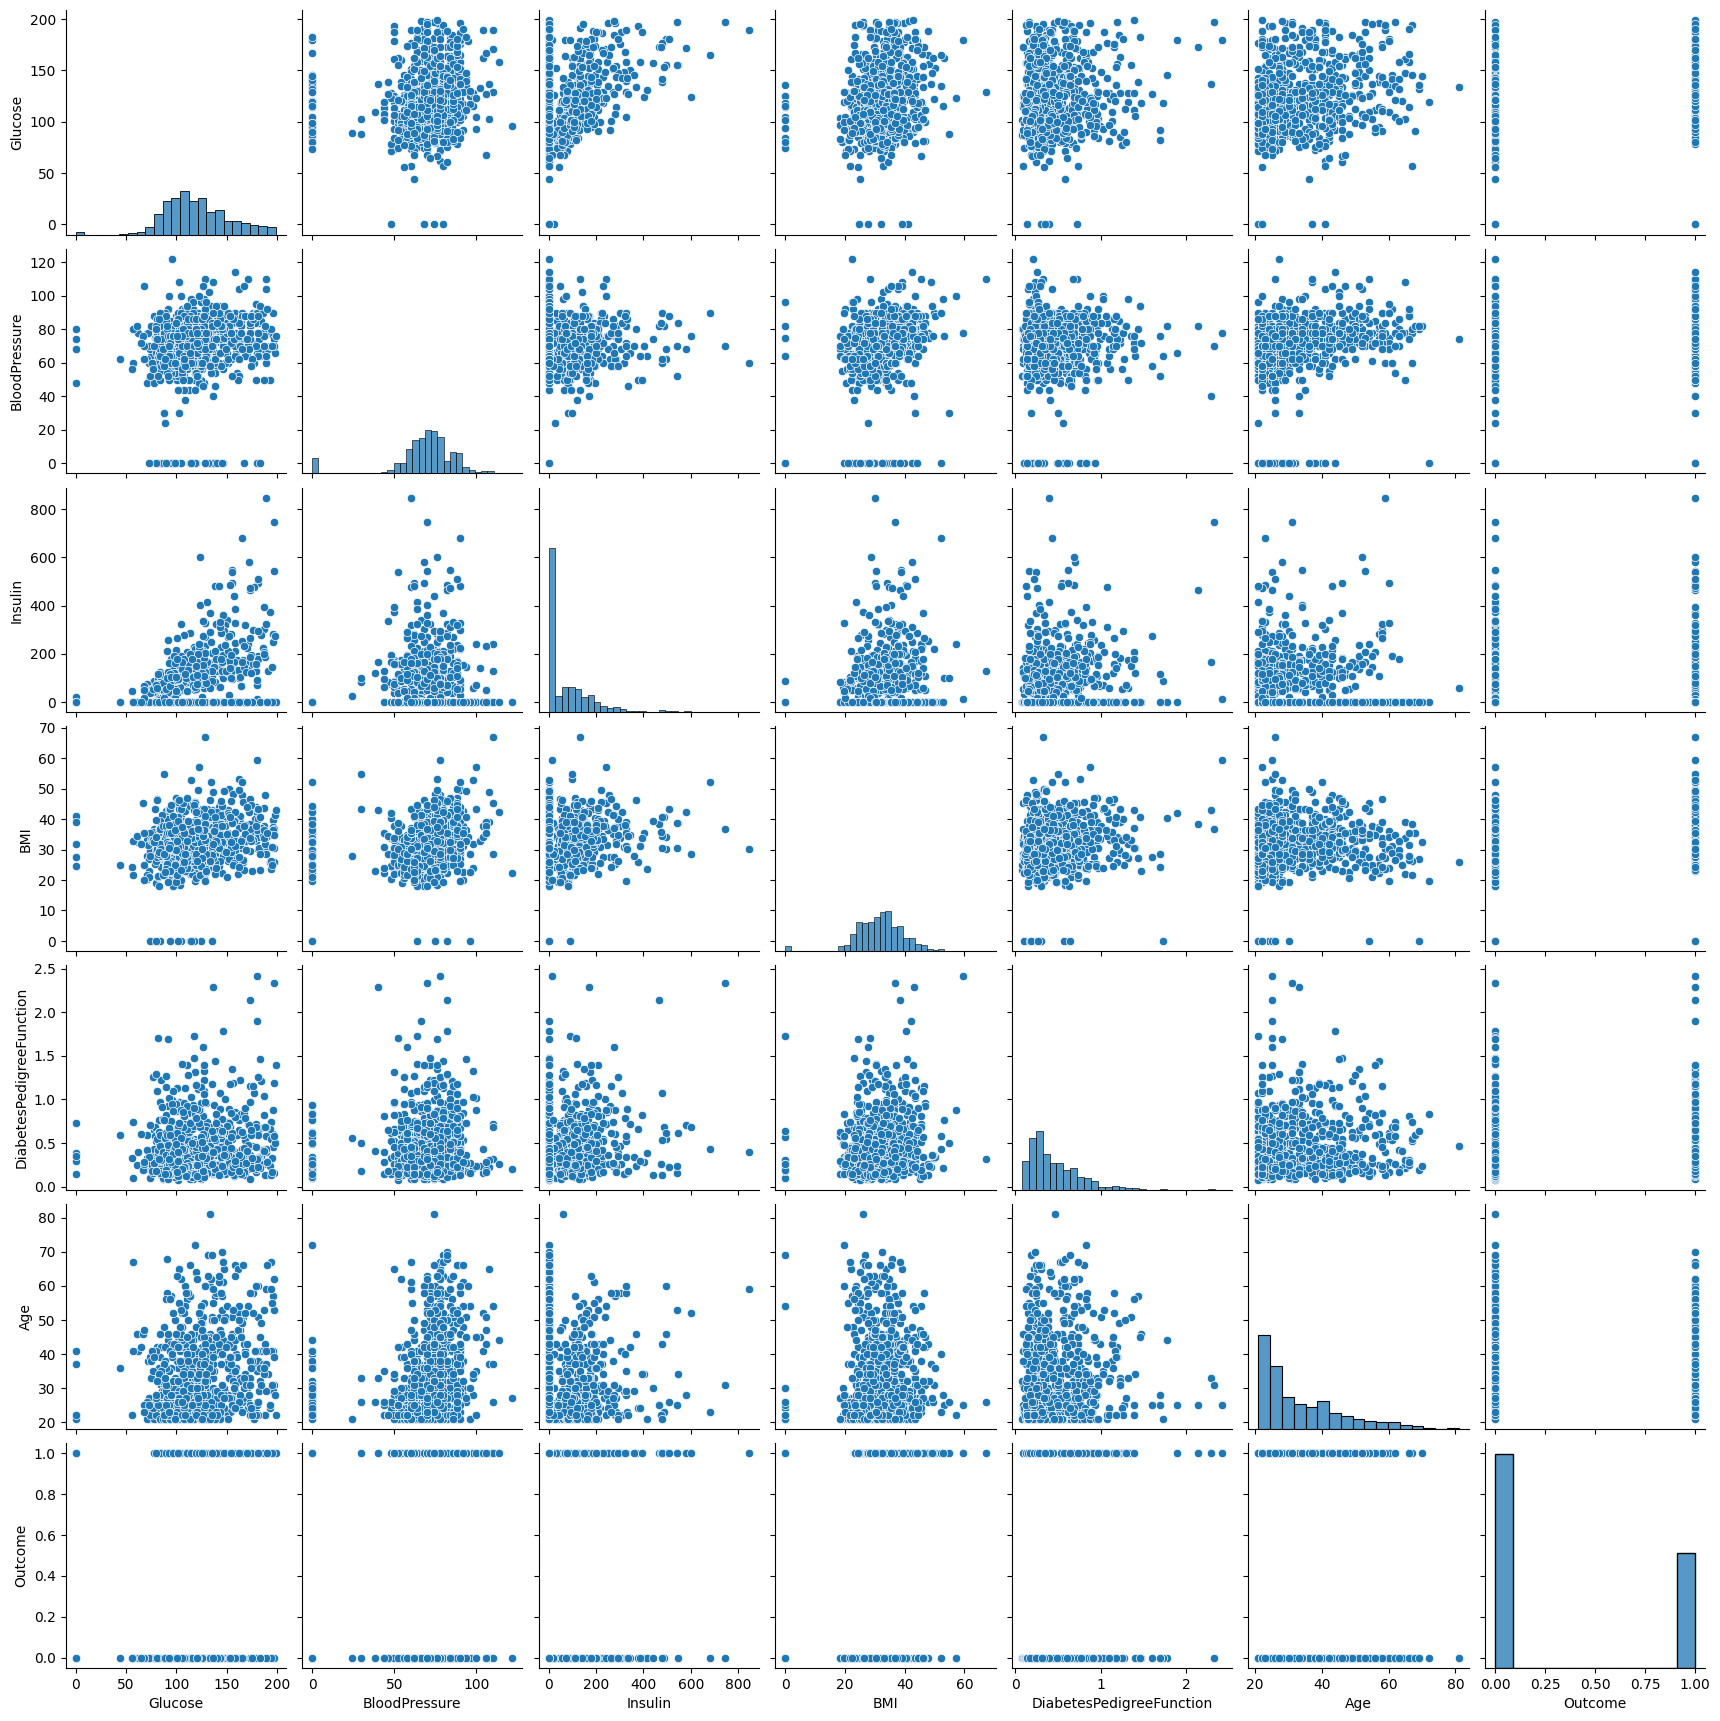

In [36]:
columns_to_drop = ['SkinThickness', 'Pregnancies']
#sns.pairplot(df=df.drop(columns_to_drop, axis=1))
df_plot = df.drop(columns_to_drop, axis=1)
df_plot.head()
sns.pairplot(df_plot)

Normalizing as the data from each column is on a vastly different scale, and the data does not seem to follow Gaussian distribution

In [37]:
# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(x_train)

# Apply the scaler on train and test data
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [38]:
x_test.shape

(154, 8)

In [39]:
#Fit model on training data

# Fit a model
training_model = LinearRegression()
model = training_model.fit(x_train, y_train)
predictions = training_model.predict(x_test)

# Create line coordinates
x_line = np.empty(x_test.shape)

#iterate through the number of columns in x_test (x_test.shape = (154, 8))
for i in range(x_test.shape[1]):
    x_line[:, i] = np.linspace(np.min(x_test[:,i]), np.max(x_test[:,i]), num=x_test.shape[0])
y_line = training_model.predict(x_line)

print('Intercept: \n', training_model.intercept_)
print('Coefficients: \n', training_model.coef_)


Intercept: 
 [-0.80059193]
Coefficients: 
 [[ 0.37299252  1.18960554 -0.27641649 -0.04832208 -0.20089947  0.90552623
   0.51237594  0.17727283]]


In [40]:
# Predictions
predictions[0:10]

array([[0.39248766],
       [0.45511678],
       [0.28019469],
       [0.41570347],
       [0.23191016],
       [0.80095512],
       [0.5988166 ],
       [0.55896404],
       [0.01073309],
       [0.57779937]])

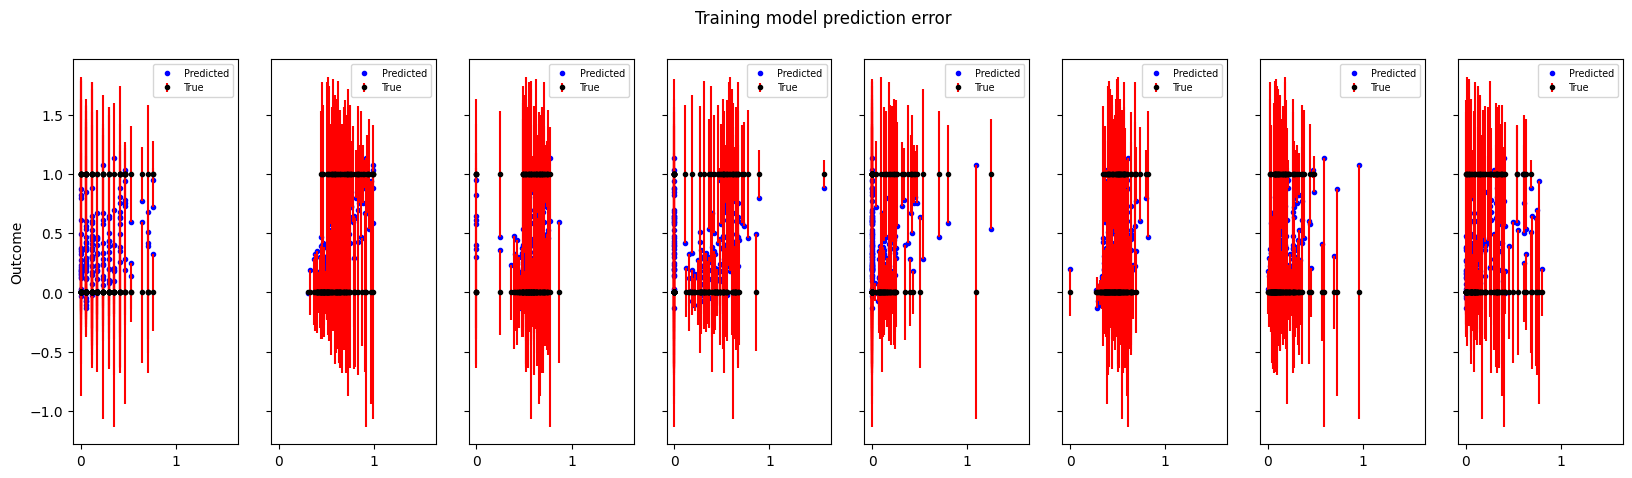

In [50]:
## Plot the errors
fig, ax = plt.subplots(1, x_test.shape[1], sharey=True, sharex=True, figsize=(20,5))
fig.suptitle("Training model prediction error")
ax[0].set_ylabel(df.columns[8])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(x_test.shape[1]):
    ax[i].errorbar(x_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(x_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

In [55]:
print ("R2 Score:", round (model.score(x_test, y_test), 8))

R2 Score: 0.16882705
